In [6]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "developer", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello!"}
  ]
)

print(completion.choices[0].message)


ChatCompletionMessage(content='Hello! How can I assist you today?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [5]:
import pandas as pd
df = pd.read_csv('bbc.csv')

In [7]:
print(df.info)

<bound method DataFrame.info of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2229       business  cars pull down us retail figures us retail sal...
2230       politics  kilroy unveils immigration policy ex-chatshow ...
2231  entertainment  rem announce new glasgow concert us band rem h...
2232       politics  how political squabbles snowball it s become c...
2233          sport  souness delight at euro progress boss graeme s...

[2234 rows x 2 columns]>


In [11]:
df.describe()

,category,text
count,2232,2232
unique,5,2124
top,business,spain coach faces racism inquiry spain s footb...
freq,512,2


In [12]:
label_counts = df['category'].value_counts()
print(label_counts)

category
business         512
sport            512
politics         421
tech             400
entertainment    387
Name: count, dtype: int64


In [13]:
len(df['text'])

2234

In [14]:
len(df['text'].unique())

2125

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
len(df['text'])

2126

In [17]:
null_counts = df.isnull().sum()
print('Count of each value in each column is:\n', null_counts)

Count of each value in each column is:
 category    2
text        2
dtype: int64


In [18]:
df.dropna(inplace=True)

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [21]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adeku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adeku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adeku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [25]:
target_label = 'tech'
target_df = df[df['category'] == target_label]
print(target_df)

     category                                               text
0        tech  tv future in the hands of viewers with home th...
19       tech  security warning over  fbi virus  the us feder...
20       tech  halo 2 heralds traffic explosion the growing p...
23       tech  mobile audio enters new dimension as mobile ph...
26       tech  mobile gig aims to rock 3g forget about going ...
...       ...                                                ...
2192     tech  piero gives rugby perspective bbc sport unveil...
2198     tech  mobile networks seek turbo boost third-generat...
2209     tech  uk pioneers digital film network the world s f...
2211     tech  local net tv takes off in austria an austrian ...
2213     tech  argonaut founder rebuilds empire jez san  the ...

[345 rows x 2 columns]


In [ ]:
target_words = [word.lower() for text in target_df['text'] 
                for word in word_tokenize(text) 
                if word.isalnum() and word.lower() not in stopwords.words('english')]

target_word_counts = Counter(target_words)
print(target_word_counts)

Counter({'said': 1362, 'people': 822, 'also': 459, 'technology': 449, 'new': 447, 'mr': 445, 'one': 434, 'could': 422, 'mobile': 420, 'would': 412, 'games': 375, 'users': 343, 'use': 336, 'us': 328, 'many': 310, 'music': 310, 'game': 309, 'net': 306, 'digital': 298, 'software': 298, 'year': 295, 'phone': 292, 'like': 287, 'online': 285, 'make': 279, 'get': 272, 'world': 268, 'computer': 260, 'time': 256, 'used': 254, 'uk': 251, 'tv': 244, 'video': 241, 'way': 239, 'service': 233, 'microsoft': 228, 'broadband': 225, 'first': 225, 'internet': 222, 'million': 218, 'using': 216, 'data': 212, 'information': 198, 'system': 193, 'phones': 193, 'market': 189, 'services': 187, 'number': 185, 'security': 182, 'says': 181, 'much': 175, 'search': 174, 'around': 169, 'according': 168, 'content': 168, 'firm': 168, 'companies': 167, 'last': 167, 'apple': 167, 'two': 166, 'work': 165, 'media': 165, 'networks': 163, 'news': 162, 'players': 161, 'pc': 161, 'take': 160, 'research': 159, 'next': 159, '000

In [28]:
word_cloud = WordCloud().generate_from_frequencies(target_word_counts)

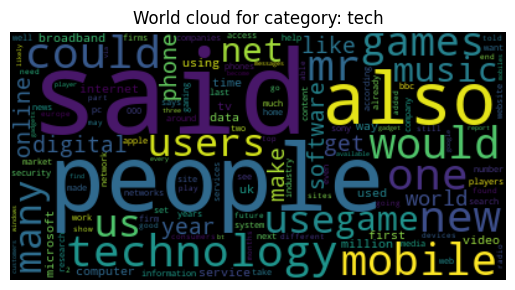

In [29]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.title(f"World cloud for category: {target_label}")
plt.show()

In [30]:
import tiktoken

In [31]:
def cal_num_tokens_from_row(string: str, encoding_name: str) -> int:
    encoding = tiktoken.encoding_for_model(encoding_name)
    token_count = len(encoding.encode(string))
    return token_count

def cal_num_tokens_from_df(df, encoding_name: str) -> int:
    total_tokens = 0
    for text in df['text']:
        total_tokens += cal_num_tokens_from_row (text, encoding_name)
    return total_tokens

In [32]:
total_tokens = cal_num_tokens_from_df(df, "gpt-3.5-turbo")
print(f"total numbver of tokens in the dataframe: {total_tokens}")

total numbver of tokens in the dataframe: 1051754


In [33]:
import csv
import os 
import random

In [34]:
os.makedirs('dataset',exist_ok=True)

In [37]:
rows = [{'text': row['text'].strip(),
                    'label': row['category'],
                    } for idx, row in df.iterrows()]

In [ ]:
# Shuffle & Randomize data.
random.seed(42)
random.shuffle(rows)

In [39]:
num_test = 500
splits = {'test':rows[0:num_test], 'train':rows[num_test:]}

In [40]:
for split in ['train', 'test']:
    with open(f'dataset/{split}.csv', 'w', newline='') as fOut:
        writer = csv.DictWriter(fOut, fieldnames=['text', 'label'])
        writer.writeheader()
        for row in splits[split]:
            writer.writerow(row)